In [2]:
import tensorflow as tf
import numpy as np
from PIL import Image

from IPython.display import Image as IPythonImage, display

In [3]:
R=4
ITER_NUM=200

In [56]:
def get_color(bg_ratio, ratio):
    def color(z, i):
        if abs(z) < R:
            return 0, 0, 0
        v = np.log2(i + R - np.log2(np.log2(abs(z)))) / 5
        if v < 1.0:
            return v**bg_ratio[0], v**bg_ratio[1], v ** bg_ratio[2]
        else:
            v = max(0, 2 - v)
            return v**ratio[0], v**ratio[1], v**ratio[2]
    return color


def gen_julia(Z, c, bg_ratio, ratio):
    xs = tf.constant(np.full(shape=Z.shape, fill_value=c, dtype=Z.dtype))
    zs = tf.Variable(Z)
    ns = tf.Variable(tf.zeros_like(xs, tf.float32))
    with tf.Session():
        tf.global_variables_initializer().run()
        zs_ = tf.where(tf.abs(zs) < R, zs**2 + xs, zs)
        not_diverged = tf.abs(zs_) < R
        step = tf.group(
            zs.assign(zs_),
            ns.assign_add(tf.cast(not_diverged, tf.float32))
        )

        for i in range(ITER_NUM):
            step.run()
        final_step = ns.eval()
        final_z = zs_.eval()
    r, g, b = np.frompyfunc(get_color(bg_ratio, ratio), 2, 3)(final_z, final_step)
    img_array = np.dstack((r, g, b))
    return Image.fromarray(np.uint8(img_array * 255))

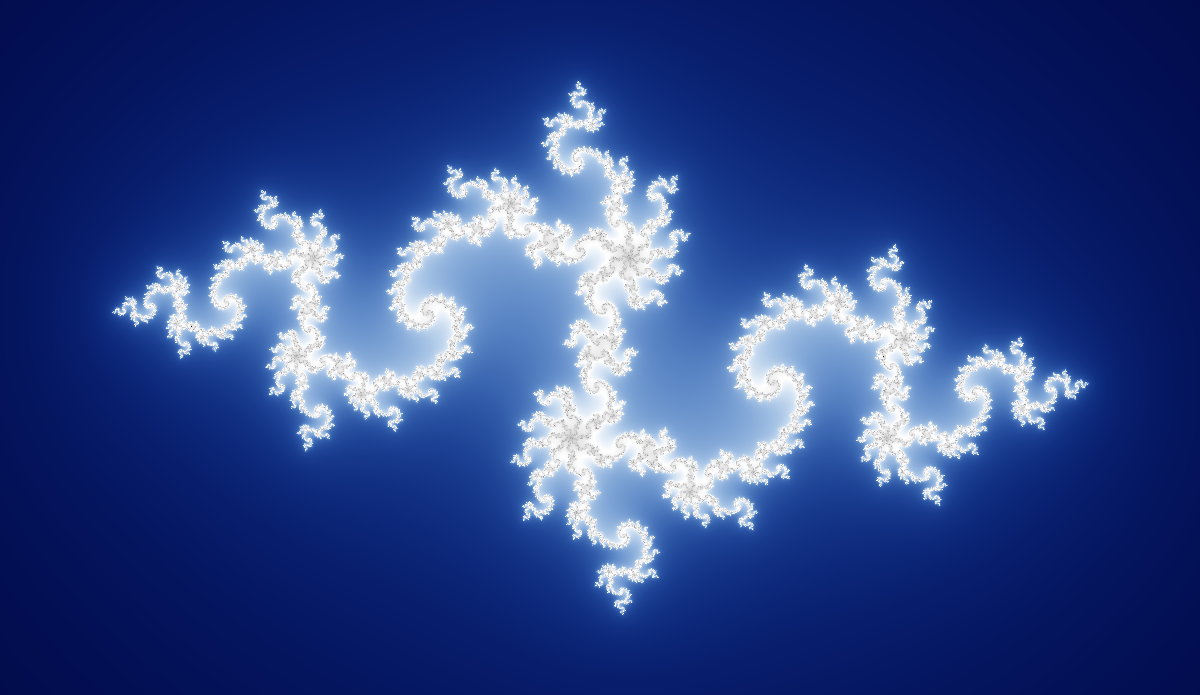

In [59]:
start_x = -1.9  # x range
end_x = 1.9
start_y = -1.1  # y range
end_y = 1.1
width = 1200  # image width
c = -0.835-0.2321 * 1j
bg_ratio = (4, 2.5, 1)
ratio = (0.9, 0.9, 0.9)

step = (end_x - start_x) / width
Y, X = np.mgrid[start_y:end_y:step, start_x:end_x:step]
Z = X + 1j * Y

img = gen_julia(Z, c, bg_ratio, ratio)
img.save('julia.png')
display(img)

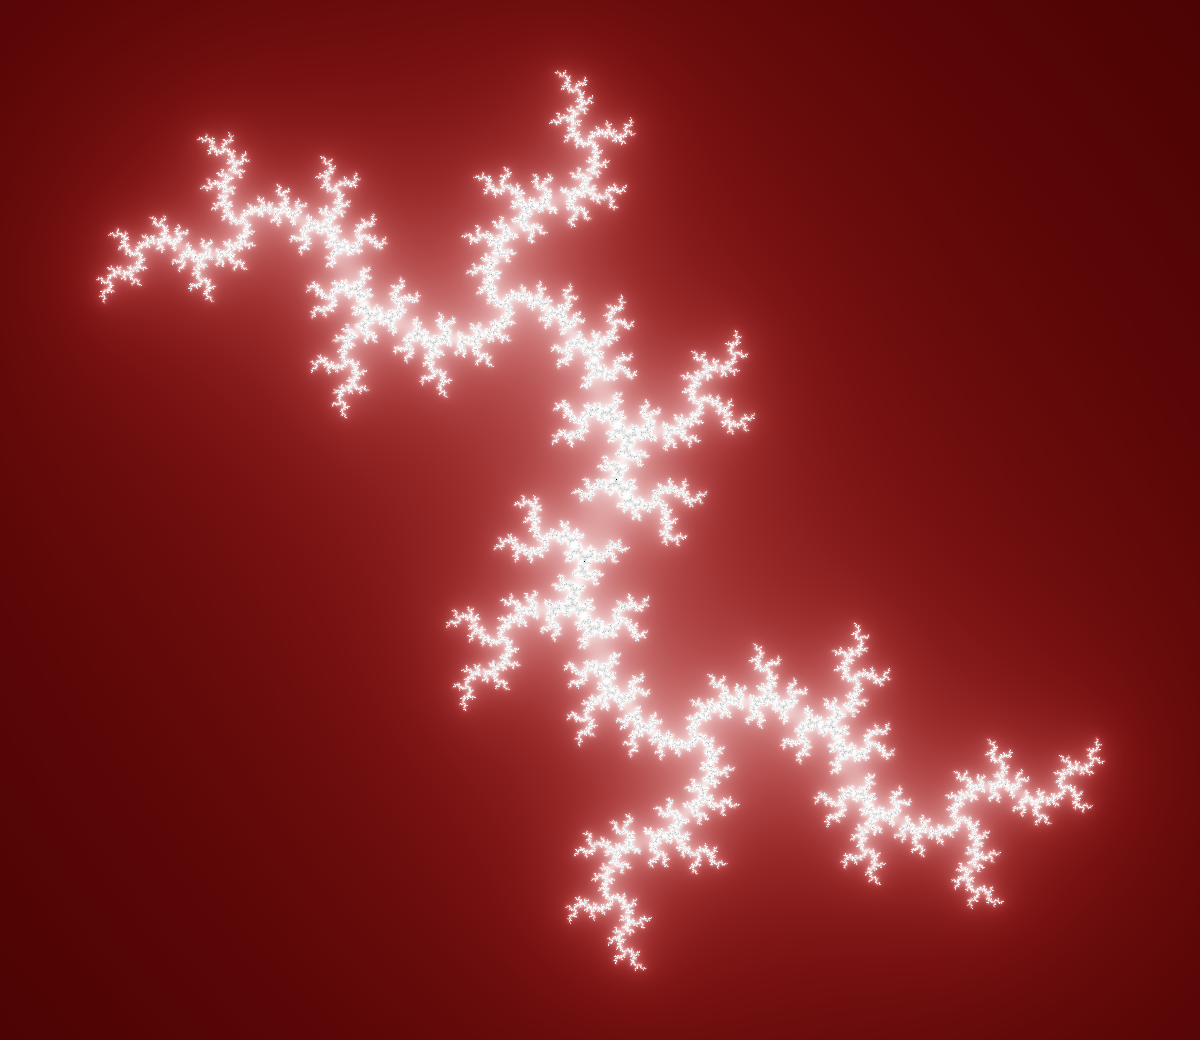

In [68]:
start_x = -1.5  # x range
end_x = 1.5
start_y = -1.3  # y range
end_y = 1.3
width = 1200  # image width
c = -0.8 * 1j
bg_ratio = (1, 3.5, 3.5)
ratio = (0.9, 0.9, 0.9)

step = (end_x - start_x) / width
Y, X = np.mgrid[start_y:end_y:step, start_x:end_x:step]
Z = X + 1j * Y

img = gen_julia(Z, c, bg_ratio, ratio)
img.save('julia.png')
display(img)

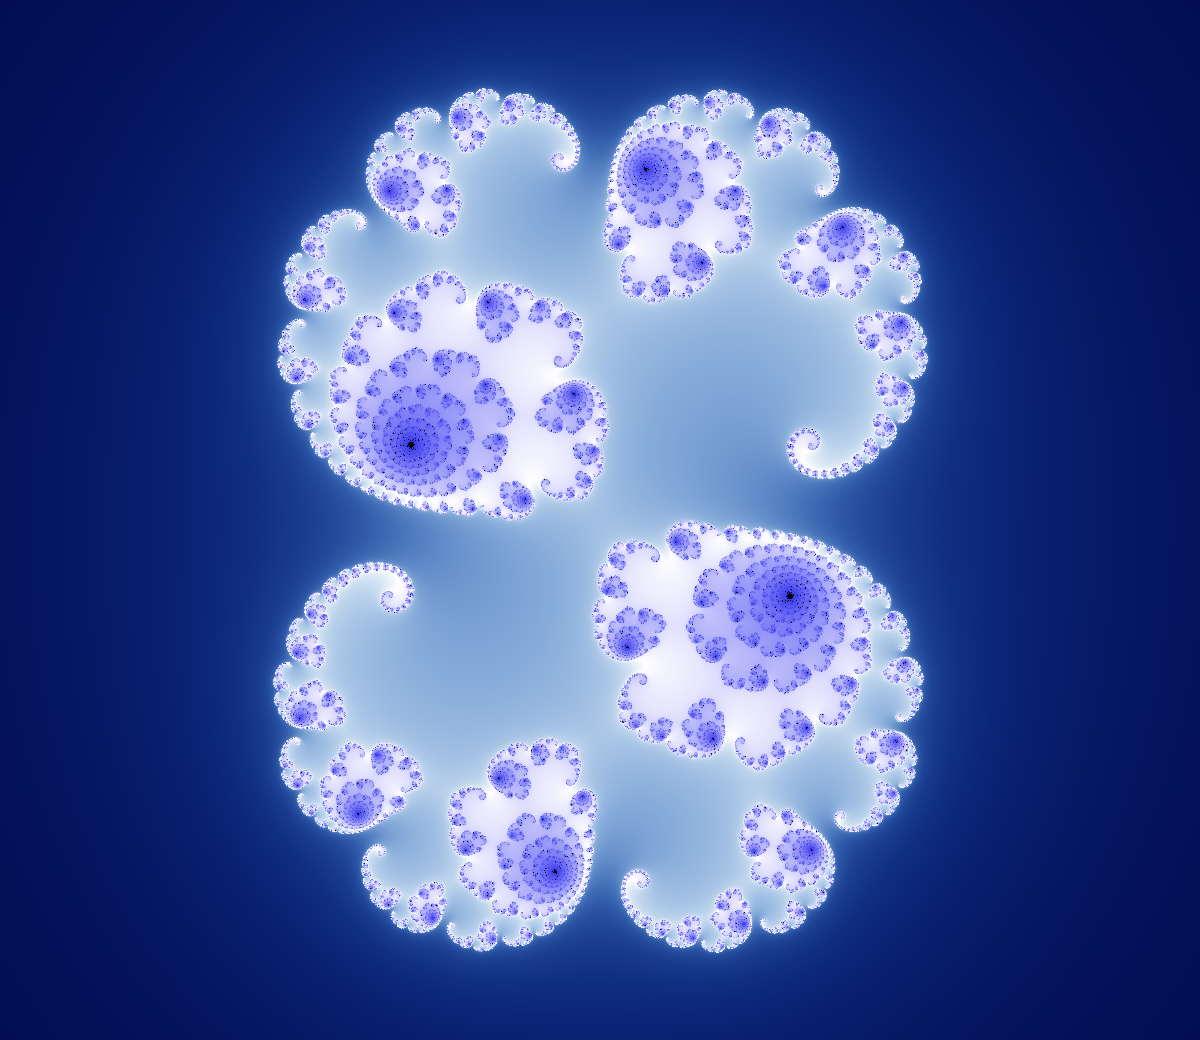

In [77]:
start_x = -1.5  # x range
end_x = 1.5
start_y = -1.3  # y range
end_y = 1.3
width = 1200  # image width
c = 0.285 + 0.01 * 1j
bg_ratio = (4, 2.5, 1)
ratio = (2, 2, 0.1)

step = (end_x - start_x) / width
Y, X = np.mgrid[start_y:end_y:step, start_x:end_x:step]
Z = X + 1j * Y

img = gen_julia(Z, c, bg_ratio, ratio)
img.save('julia.png')
display(img)